In [4]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from operator import itemgetter

In [5]:
#df = pd.read_excel('data.xlsx', 'Sheet1', index_col=None, na_values=[''])
df = pd.read_csv('test.csv')

C:\Users\sbassam\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (97,117) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,xml_document_id,ein,orgname,orgnamecrp,ultorg,document_link,dba,subsection_code,period_begin,period_end,...,filingid,realcode,codesource,displayyear,expoutcands,recipfectot,recipfecattrib,schc,schCtot,dupe
0,1935533,953618401,Union Employees Vacation Savings and Supplemen...,Union Employees Vacation Savings & Supp Dues T...,NaN,NaN,NaN,5.0,2014-05-01 00:00:00 -0400,2015-04-30 00:00:00 -0400,...,NaN,Y4000,NaN,2014.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1964797,453998754,UNITED BROTHERHOOD OF CARPENTERS & JOINERS OF ...,United Brotherhood of Carpenters & Joiners of ...,NaN,NaN,NaN,5.0,2014-01-01 00:00:00 -0500,2014-12-31 00:00:00 -0500,...,NaN,Y4000,NaN,2014.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1965152,480287347,KANSAS MUNICIPAL UTILITIES INC,Kansas municipal utilities,NaN,NaN,NaN,4.0,2014-01-01 00:00:00 -0500,2014-12-31 00:00:00 -0500,...,NaN,Y4000,ind16,2014.0,0.0,0.0,0.0,NaN,NaN,NaN
3,1932456,940577270,INTL BROTHERHOOD OF ELECT WORKERS 100,IBEW Local 100,Intl Brotherhood of Electrical Workers,NaN,NaN,5.0,2014-01-01 00:00:00 -0500,2014-12-31 00:00:00 -0500,...,NaN,LC150,ind16,2014.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1932516,941265639,MARIN VISITORS NETWORK,Marin visitors network,NaN,NaN,NaN,6.0,2014-01-01 00:00:00 -0500,2014-12-31 00:00:00 -0500,...,NaN,Y4000,NaN,2014.0,0.0,0.0,0.0,NaN,NaN,NaN


In [6]:
# Let's now choose the important columns:
df = df[['xml_document_id'
,'ein'
,'orgname'
,'tot_volunteers'
,'all_year_employees'
,'tot_rev_current'
,'grants_orgs_us'
,'expenses_total'
,'phone'
,'street'
,'city'
,'state'
,'zip'
,'principal_name'
,'web'
,'period_begin'
,'legal_dom'
,'firm_name'
,'firm_street'
,'firm_city'
,'firm_state'
,'firm_phone'
,'engaged_in_political_act_cbx'
,'officer_business_rel_cbx'
,'family_business_rel_cbx'
,'total_persons_100000'
,'expoutcands'
,'recipfecattrib'
,'source']]

In [7]:
df['expoutcands'] = pd.to_numeric(df['expoutcands'], errors='coerce');
df['expenses_total'] = pd.to_numeric(df['expenses_total'], errors='coerce');
df['tot_rev_current'] = pd.to_numeric(df['tot_rev_current'], errors='coerce');
df['period_begin'] = pd.to_datetime(df['period_begin'], errors='coerce');

In [85]:
#df['source'].dtype
df.dtypes

xml_document_id                          int64
ein                                      int64
orgname                                 object
tot_volunteers                         float64
all_year_employees                     float64
tot_rev_current                        float64
grants_orgs_us                         float64
expenses_total                         float64
phone                                   object
street                                  object
city                                    object
state                                   object
zip                                     object
principal_name                          object
web                                     object
period_begin                    datetime64[ns]
legal_dom                               object
firm_name                               object
firm_street                             object
firm_city                               object
firm_state                              object
firm_phone   

In [111]:
#df['year'] = df['period_begin'].dt.year
df['period_begin'] = pd.to_datetime(df['period_begin'])
df['year'] = df['period_begin'].dt.year

In [112]:
df['active'] = 0
df.loc[df['engaged_in_political_act_cbx'] == 'y', 'active'] = 1
df.loc[df['engaged_in_political_act_cbx'] == 'Y', 'active'] = 1
df.loc[df['source'] == 'os', 'source'] = 'OS'
#df.loc[df['source'] == 'OS', 'active'] = 'OS'
#Test: this should return an empty series:
#df[(df['engaged_in_political_act_cbx'] == 'y') & (df['active'] != 1)]['active']

In [113]:
df1 = df[(df['source'] == 'OS') | (df['active'] == 1) ][['expenses_total','tot_rev_current', 'expoutcands', 'tot_volunteers',
                                'grants_orgs_us', 'all_year_employees',
                                'total_persons_100000', 'recipfecattrib', 'active', 'xml_document_id']]

In [114]:
df1 = df1.fillna(0)

In [245]:
df1[df1['active'] == 1]

,expenses_total,tot_rev_current,expoutcands,tot_volunteers,grants_orgs_us,all_year_employees,total_persons_100000,recipfecattrib,active,xml_document_id
129,4.255015e+06,4.231147e+06,0.0,0.0,93807.0,93.0,6.0,0.0,1,2001332
159,9.057179e+06,9.539915e+06,0.0,2979.0,5000.0,53.0,7.0,0.0,1,1912619
176,1.338813e+07,1.441955e+07,0.0,0.0,60866.0,62.0,6.0,0.0,1,1964264
220,5.940982e+06,6.662611e+06,0.0,0.0,224095.0,361.0,13.0,0.0,1,1963811
295,1.227972e+06,1.224067e+06,0.0,0.0,12555.0,21.0,1.0,0.0,1,1967369
313,1.481361e+06,1.481768e+06,0.0,30.0,210523.0,0.0,0.0,0.0,1,1964515
317,3.148124e+06,3.279274e+06,0.0,765.0,10000.0,15.0,3.0,0.0,1,1967955
375,7.274898e+06,9.189176e+06,0.0,274.0,301248.0,64.0,7.0,0.0,1,1966046
499,7.826680e+06,8.785813e+06,0.0,100.0,43295.0,34.0,6.0,0.0,1,2004633
500,4.079457e+06,4.015483e+06,0.0,0.0,12385.0,15.0,7.0,0.0,1,2005118


In [115]:
df1.describe()

,expenses_total,tot_rev_current,expoutcands,tot_volunteers,grants_orgs_us,all_year_employees,total_persons_100000,recipfecattrib,active,xml_document_id
count,9.062000e+03,9.062000e+03,9.062000e+03,9.062000e+03,9.062000e+03,9062.000000,9062.000000,9.062000e+03,9062.000000,9.062000e+03
mean,1.887128e+07,1.940169e+07,6.887012e+04,1.384884e+03,3.069455e+05,63.866365,7.001876,9.676111e+03,0.952218,1.656328e+06
std,1.418302e+08,1.466783e+08,1.261071e+06,5.411146e+04,3.491770e+06,197.635511,34.067823,2.743331e+05,0.213316,2.187563e+06
min,0.000000e+00,-5.308228e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-6.000000,0.000000e+00,0.000000,1.260000e+03
25%,9.856572e+05,1.024479e+06,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,0.000000,0.000000e+00,1.000000,6.335622e+05
50%,1.970598e+06,2.060434e+06,0.000000e+00,0.000000e+00,0.000000e+00,15.000000,1.000000,0.000000e+00,1.000000,1.182848e+06
75%,5.544318e+06,5.751503e+06,0.000000e+00,0.000000e+00,1.217675e+04,41.000000,3.000000,0.000000e+00,1.000000,1.738660e+06
max,4.905853e+09,5.080311e+09,7.116170e+07,2.930000e+06,1.176971e+08,3440.000000,947.000000,2.028506e+07,1.000000,9.999999e+06


In [472]:
# out of box performance:
    # accuracy score for tree:  77%
    # precision for tree:  26%
    # recall for tree:  28%
# Not terrible overall. I haven't done any feature/algorithm selection or parameter/algorithm tuning. I predict the accuracy is 
# going to go up to 90% with precision and recall of about 60% once I do those. Next, I'll try to derive some insight from orgs'
# names and use it as a feature.

In [116]:
# Define features and the label
# label:
labels = ['active']
# features:
features = ['tot_rev_current', 'expoutcands', 'tot_volunteers', 
           'expenses_total', 'grants_orgs_us', 'all_year_employees', 'total_persons_100000', 'recipfecattrib']


In [117]:
# Feature Engineering
## 1) Feature Scaling
## 2) New Features
# Try total # of employees to total expenses
df1['employee_to_expenses'] = df1['all_year_employees']*1000000/df1['expenses_total']
df1['revenue_to_expenses'] = df1['tot_rev_current']/df1['expenses_total']
df1['grant_to_expense'] = df1['grants_orgs_us']/df1['expenses_total']

In [118]:
features.append('employee_to_expenses')
# accuracy score for tree:  78%
# precision for tree:  30%
# recall for tree:  31%
features.append('revenue_to_expenses')
# accuracy score for tree:  77%
# precision for tree:  28%
# recall for tree:  33%
features.append('grant_to_expense')


In [106]:
features

['tot_rev_current',
 'expoutcands',
 'tot_volunteers',
 'expenses_total',
 'grants_orgs_us',
 'all_year_employees',
 'total_persons_100000',
 'recipfecattrib',
 'employee_to_expenses',
 'revenue_to_expenses',
 'grant_to_expense']

In [107]:
features_train

,tot_rev_current,expoutcands,tot_volunteers,expenses_total,grants_orgs_us,all_year_employees,total_persons_100000,recipfecattrib,employee_to_expenses,revenue_to_expenses,grant_to_expense
85951,1.364670e+05,0.0,0.0,1.256070e+05,0.0,0.0,0.0,0.0,0.000000,1.086460,0.000000
91742,3.630438e+07,0.0,540.0,3.752370e+07,429413.0,206.0,22.0,0.0,5.489864,0.967505,0.011444
38822,4.793286e+09,0.0,0.0,4.586519e+09,0.0,412.0,5.0,0.0,0.089828,1.045081,0.000000
36843,3.830075e+06,0.0,0.0,4.069019e+06,0.0,18.0,0.0,0.0,4.423671,0.941277,0.000000
20319,5.709337e+06,0.0,0.0,6.431316e+06,100000.0,37.0,0.0,0.0,5.753099,0.887740,0.015549
57884,3.954250e+07,0.0,0.0,4.257479e+07,0.0,27.0,12.0,0.0,0.634178,0.928777,0.000000
38214,1.228190e+07,0.0,0.0,1.106473e+07,2150.0,60.0,12.0,0.0,5.422635,1.110004,0.000194
86015,2.249680e+05,551.0,19.0,2.452830e+05,0.0,0.0,0.0,0.0,0.000000,0.917177,0.000000
85759,6.031400e+04,0.0,0.0,1.909890e+05,0.0,0.0,0.0,0.0,0.000000,0.315798,0.000000
40549,6.953250e+05,0.0,66.0,6.591910e+05,34840.0,6.0,0.0,0.0,9.102066,1.054816,0.052853


In [401]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
features_train = scl.fit_transform(features_train)

# accuracy score for tree:  51%
# precision for tree:  22%
# recall for tree:  83%
# it improved recall drastically (about 50% increase), but decreased accuracy to 55% and recall to 22%
# Note: this is the result of df1. df has very poor results with feature scaling. hold off for now.
# feature scaling on df resulted in 0.5% recall!! without feature scaling:
# accuracy score for tree:  0.729249011858
# precision for tree:  0.301075268817
# recall for tree:  0.28

In [121]:
df1 = df1.dropna()

In [122]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
train_test_split(df1[features], df1[labels], test_size=0.3, random_state=42)

In [123]:
clf = tree.DecisionTreeClassifier(random_state = 19)

# fit:
clf.fit(features_train, labels_train)

# predict:
pred = clf.predict(features_test)

# score:
tree_score = clf.score(features_test, labels_test)
print  'accuracy score for tree: ', tree_score

tree_precision = precision_score(labels_test, pred)
print 'precision for tree: ', tree_precision
tree_recall = recall_score(labels_test, pred)
print 'recall for tree: ', tree_recall
importance = sorted(zip(features,clf.feature_importances_), key=itemgetter(1))
print 'feature importances: ', importance

accuracy score for tree:  0.970176730486
precision for tree:  0.981161091888
recall for tree:  0.987616099071
feature importances:  [('recipfecattrib', 0.0065678116210289321), ('total_persons_100000', 0.0073157954067204732), ('all_year_employees', 0.0073232215195507787), ('tot_volunteers', 0.017680445411481088), ('grant_to_expense', 0.024790629477020577), ('grants_orgs_us', 0.02965981104514109), ('employee_to_expenses', 0.031285858991013452), ('expoutcands', 0.035598256689797068), ('revenue_to_expenses', 0.081374145083012939), ('tot_rev_current', 0.082149142090343283), ('expenses_total', 0.6762548826648902)]


In [64]:
dftest = np.array(df1[features])
dftest

array([[  3.78388000e+05,   0.00000000e+00,   0.00000000e+00, ...,
          6.57588083e+01,   7.31833646e-01,   1.66331103e-03],
       [  6.42050000e+05,   0.00000000e+00,   2.90000000e+01, ...,
          3.22527064e+00,   1.03539251e+00,   0.00000000e+00],
       [  4.55720000e+05,   0.00000000e+00,   0.00000000e+00, ...,
          2.83280234e+01,   8.60643122e-01,   0.00000000e+00],
       ..., 
       [  1.46831200e+06,   0.00000000e+00,   0.00000000e+00, ...,
          3.26348922e+00,   1.19795510e+00,   2.27628373e-02],
       [  1.20747780e+07,   0.00000000e+00,   0.00000000e+00, ...,
          2.30836450e+00,   1.03233292e+00,   4.69632824e-01],
       [  1.00692900e+07,   0.00000000e+00,   0.00000000e+00, ...,
          2.91976395e+00,   1.17599800e+00,   2.84012914e-01]])

In [19]:
# Try different algorithms:
from sklearn.svm import SVC
clf = SVC()

# fit:
clf.fit(features_train, labels_train.values.ravel())

# predict:
pred = clf.predict(features_test)
l = np.array(pred)
print l
# score:
svm_score = clf.score(features_test, labels_test)
print svm_score

SVM_precision = precision_score(labels_test, pred)
print 'precision for SVM: ', SVM_precision
SVM_recall = recall_score(labels_test, pred)
print 'recall for SVM: ', SVM_recall

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.979405034325
precision for SVM:  0.979405034325
recall for SVM:  1.0


In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# fit:
clf.fit(features_train, labels_train)

# predict:
pred = clf.predict(features_test)

# score:
nb_score = clf.score(features_test, labels_test)
print 'naive bayes score: ', nb_score

nb_precision = precision_score(labels_test, pred)
print 'precision for nb: ', nb_precision
nb_recall = recall_score(labels_test, pred)
print 'recall for nb: ', nb_recall

naive bayes score:  0.475972540046
precision for nb:  0.990147783251
recall for nb:  0.469626168224


C:\Users\sbassam\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(features_train, labels_train) 

pred = clf.predict(features_test)

accuracy = accuracy_score(labels_test, pred)

print 'accuracy', accuracy
# score:
knn_score = clf.score(features_test, labels_test)
print  'accuracy score for knn: ', knn_score

#print labels_test
#print pred
knn_precision = precision_score(labels_test, pred)
print 'precision for knn: ', knn_precision
knn_recall = recall_score(labels_test, pred)
print 'recall for knn: ', knn_recall

accuracy 0.977116704805
accuracy score for knn:  0.977116704805
precision for knn:  0.995260663507
recall for knn:  0.981308411215


C:\Users\sbassam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [27]:
from sklearn.decomposition import RandomizedPCA
from sklearn.grid_search import GridSearchCV
n_components = 11


pca = RandomizedPCA(n_components=n_components, whiten=True).fit(features_train)



X_train_pca = pca.transform(features_train)
X_test_pca = pca.transform(features_test)

print 'explained variances: ', sorted(zip(features, pca.explained_variance_ratio_),key=itemgetter(1))

explained variances:  [('grant_to_expense', 9.0247512095453869e-22), ('revenue_to_expenses', 2.0186531397803401e-18), ('employee_to_expenses', 8.0849308002757641e-18), ('recipfecattrib', 2.0944471008015399e-15), ('total_persons_100000', 1.3149512635516628e-13), ('all_year_employees', 1.9026992891489197e-11), ('grants_orgs_us', 5.7715531287469385e-09), ('expenses_total', 3.074141966117675e-05), ('tot_volunteers', 0.00030958233585226481), ('expoutcands', 0.00056019304226253078), ('tot_rev_current', 0.99909858535333096)]


In [137]:
import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit

#from feature_format import featureFormat, targetFeatureSplit
'''
PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"
'''
def test_classifier(clf, dataset, features, labels, folds = 1000):
    data = df1
    #print 'this is data: -------------------'
    #print data
    #print df1['active']
    features = np.array(df1[features])
    labels = np.array(df1[labels])
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    #print labels
    #print features
    #print cv
    #print 'this is cv'
    #print cv
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        print accuracy, 'this is accuracy'
        precision = 1.0*true_positives/(true_positives+false_positives)
        print precision, 'this is precision'
        recall = 1.0*true_positives/(true_positives+false_negatives)
        print recall, 'this is recall'
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        print f1
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print f2
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        #print "Precision or recall may be undefined due to a lack of true positive predicitons.", true_positives, true_negatives,false_negatives,false_positives

In [138]:
test_classifier(clf, df1, features, labels, folds = 10)

0.971964679912 this is accuracy
0.983510147601 this is precision
0.987152777778 this is recall
0.985328096118
0.986422094745
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=19, splitter='best')
Got a divide by zero when trying out: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=19, splitter='best')


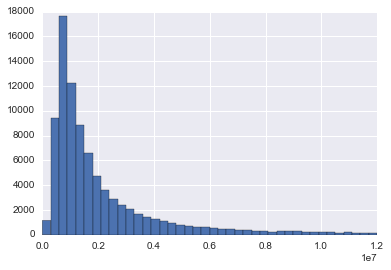

In [279]:
%matplotlib inline
plt.hist(df["expenses_total"].dropna(), bins = 40, range=[1, 12000000])
plt.show()

In [28]:
#remove outliers
high = df1.quantile(.75) + 1.5*(df1.quantile(.75)- df1.quantile(.25))
low = df1.quantile(.25) - 1.5*(df1.quantile(.75)- df1.quantile(.25))

expenses_total          10560491.25
tot_rev_current         11545953.00
expoutcands                    0.00
tot_volunteers               175.00
grants_orgs_us            299027.50
all_year_employees            72.00
total_persons_100000           7.50
recipfecattrib                 0.00
active                         0.00
xml_document_id          2418061.25
dtype: float64

In [27]:
df1[df1['expenses_total'] > high['expenses_total']]

,expenses_total,tot_rev_current,expoutcands,tot_volunteers,grants_orgs_us,all_year_employees,total_persons_100000,recipfecattrib,active,xml_document_id
5,1.156277e+07,1.174137e+07,0.0,9.0,0.0,7.0,1.0,0.0,0,1932608
20,1.309007e+07,1.630112e+07,0.0,93.0,200000.0,73.0,8.0,0.0,0,1965857
79,2.040888e+07,3.972275e+07,0.0,0.0,41200.0,63.0,32.0,0.0,0,1961149
93,1.413819e+07,1.570757e+07,0.0,0.0,0.0,174.0,10.0,0.0,0,1933021
112,1.489035e+07,1.607681e+07,0.0,0.0,0.0,36.0,25.0,0.0,0,1933064
125,3.509477e+07,3.547983e+07,0.0,85.0,9925.0,63.0,6.0,0.0,0,1965765
176,1.338813e+07,1.441955e+07,0.0,0.0,60866.0,62.0,6.0,0.0,1,1964264
206,1.215903e+07,1.364306e+07,0.0,0.0,0.0,46.0,19.0,0.0,0,1965188
217,4.401609e+07,4.430301e+07,0.0,1500.0,1689790.0,241.0,39.0,0.0,0,1961125
259,1.530412e+07,1.525607e+07,0.0,1621.0,3576095.0,99.0,1.0,0.0,0,1965491


In [ ]:

# plot to find out if there are outliers

def draw(df, var_x, var_y):
    """ take two features from a dataframe,
        draws a scatterplot
    """
    data = np.array(df[[var_x, var_y, 'active', 'xml_document_id']])

    for point in data:
        x = point[0]
        y = point[1]
        #plt.scatter( expenses_total, tot_rev_current )
        if point[2] == 1:
                plt.scatter( x, y, color = "r" )
        elif point[2] == 0:
                plt.scatter( x, y, color = "b" )
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    #plt.suptitle("Before Removing the Outlier")
    plt.show()


draw(df1, 'expenses_total', 'tot_rev_current')

In [ ]:
draw(df1, 'tot_volunteers', 'tot_rev_current')

In [ ]:
# check expenses_total outliers
df1.sort_values(['expenses_total','tot_rev_current'], ascending = False ).head()

In [ ]:
# the following organizations have exceptionally high total revenue. going to consider them outliers till i consult with Robert.
# xml_document_id, orgname, tot_rev_current
# 2103881, Health Insurance Plan of Greater New York, 5,187,437,630
# 2132202, DELTA DENTAL OF CALIFORNIA, 5,318,095,903
df1 = df1.loc[df1['xml_document_id'] != 2103881]
df1 = df1.loc[df1['xml_document_id'] != 2132202]

In [ ]:
# Did that change the performance?
#Out of the box Decision Tree
clf = tree.DecisionTreeClassifier(random_state = 19)

# fit:
clf.fit(features_train, labels_train)

# predict:
pred = clf.predict(features_test)

# score:
tree_score = clf.score(features_test, labels_test)
print  'accuracy score for tree: ', tree_score

tree_precision = precision_score(labels_test, pred)
print 'precision for tree: ', tree_precision
tree_recall = recall_score(labels_test, pred)
print 'recall for tree: ', tree_recall
importance = sorted(zip(features,clf.feature_importances_), key=itemgetter(1))
print 'feature importances: ', importance